In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [2]:
import seaborn as sns

In [3]:
%cd /kaggle/

/kaggle


# Exploratory Data Analysis

D_* = Delinquency variables

S_* = Spend variables

P_* = Payment variables

B_* = Balance variables

R_* = Risk variables

In [4]:
df = pd.read_csv("./input/amex-default-prediction/train_data.csv", nrows=100000)


In [5]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [6]:
df.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=190)

In [7]:
num_cols = len(df.columns)
num_cols

190

In [8]:
col_cat = dict()
for i in df.columns:
    cat = i.split("_")[0]
    if cat not in col_cat.keys():
        col_cat[cat] = []
    col_cat[cat].append(i)
    
    

In [9]:
for key, val in col_cat.items():
    print(key, len(val))

customer 1
S 22
P 3
D 96
B 40
R 28


# Finding NAN

In [10]:
nan_data = pd.DataFrame()
k = (df.isna().sum()/ len(df))*100
thresh = 50
    
nan_data["column"] = df.columns
nan_data["nan_percent"] = list(k)
nan_data["col_category"] = [col.split("_")[0] for col in df.columns]
nan_data.head()


,column,nan_percent,col_category
0,customer_ID,0.000,customer
1,S_2,0.000,S
2,P_2,0.786,P
3,D_39,0.000,D
4,B_1,0.000,B


In [11]:
nan_data.describe()

,nan_percent
count,190.000000
mean,15.281868
std,31.863822
min,0.000000
25%,0.000000
50%,0.120000
75%,3.216000
max,99.927000


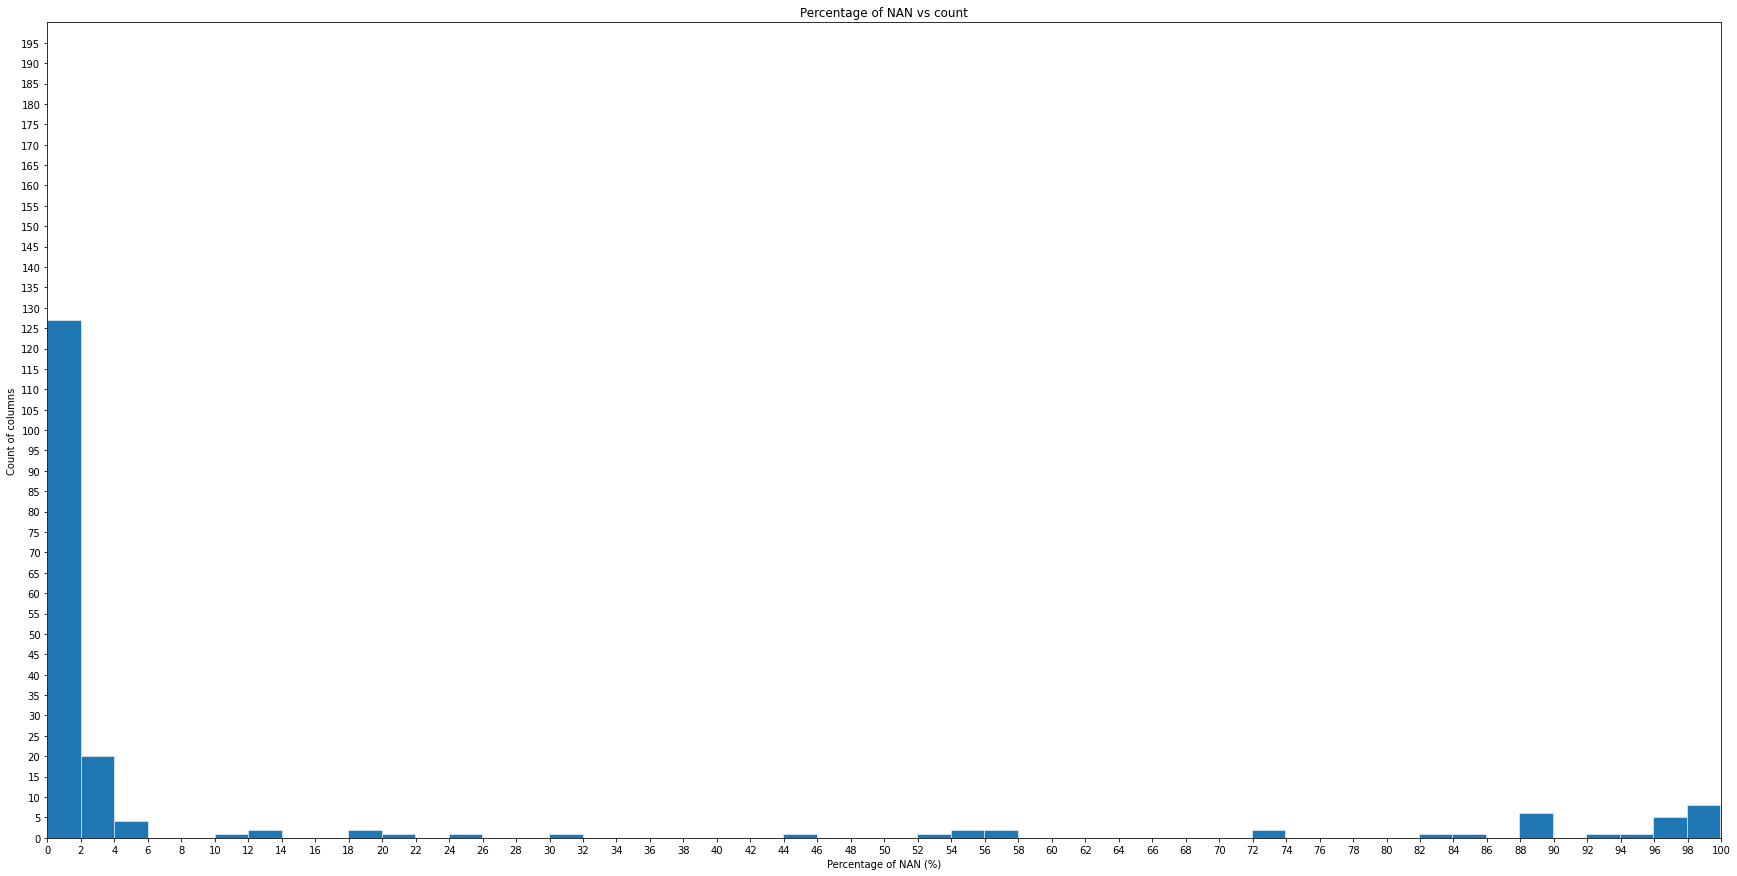

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure(figsize=(30, 15))
ax = f.add_subplot()
plt.title("Percentage of NAN vs count")
plt.xlabel("Percentage of NAN (%)")
plt.ylabel("Count of columns")
ax.hist(nan_data["nan_percent"], bins=50, linewidth=0.5, edgecolor="white")


ax.set(ylim=(0, 200), xlim=(0, 100), xticks=range(0,101,2), yticks=range(0,200,5))


f.show()

In [13]:
#Investigate high NAN valued columns:
thresh=50
print(list(nan_data[nan_data["nan_percent"]>thresh]["column"]))
print("\n\n")
print(nan_data[nan_data["nan_percent"]>thresh]["col_category"].value_counts())


['D_42', 'D_49', 'D_50', 'D_53', 'D_56', 'S_9', 'B_17', 'D_66', 'D_73', 'D_76', 'R_9', 'D_82', 'B_29', 'D_87', 'D_88', 'D_105', 'D_106', 'R_26', 'D_108', 'D_110', 'D_111', 'B_39', 'B_42', 'D_132', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_142']



D    23
B     4
R     2
S     1
Name: col_category, dtype: int64


In [14]:
updated_df = df.drop(list(nan_data[nan_data["nan_percent"]>thresh]["column"]), axis=1)

In [15]:
updated_df.columns
len(updated_df.columns)

160

# Correlation

In [16]:
updated_df.corr()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
P_2,1.000000,-0.202267,-0.363636,0.541000,-0.470981,-0.339025,-0.325265,-0.445654,-0.291158,-0.578546,...,-0.207885,-0.210875,-0.137537,-0.018536,-0.184082,-0.139356,-0.179389,-0.184153,-0.000468,-0.162188
D_39,-0.202267,1.000000,0.178518,-0.196191,0.201702,0.061351,0.450959,0.168934,0.047847,0.139528,...,0.052114,0.060137,0.040360,-0.002651,0.035094,0.032070,0.035097,0.035125,0.006454,0.033679
B_1,-0.363636,0.178518,1.000000,-0.624861,0.218701,0.148964,0.197840,0.720380,0.044479,0.315009,...,0.139727,0.133757,0.102639,0.061796,0.107691,0.041977,0.105169,0.107648,0.024616,0.090285
B_2,0.541000,-0.196191,-0.624861,1.000000,-0.300065,-0.229825,-0.261465,-0.712886,-0.119227,-0.451061,...,-0.204225,-0.203426,-0.148879,-0.021896,-0.158248,-0.088434,-0.155777,-0.158505,-0.048865,-0.130672
R_1,-0.470981,0.201702,0.218701,-0.300065,1.000000,0.208104,0.280564,0.263883,0.177512,0.398761,...,0.124245,0.139002,0.097499,0.037247,0.082563,0.065633,0.081240,0.082740,0.011914,0.076451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D_140,-0.139356,0.032070,0.041977,-0.088434,0.065633,0.062459,0.038194,0.063372,0.066590,0.098864,...,0.042494,0.050161,0.022717,0.004481,0.319281,1.000000,0.317461,0.316361,-0.039099,0.202479
D_141,-0.179389,0.035097,0.105169,-0.155777,0.081240,0.050168,0.054232,0.134350,0.056972,0.139383,...,0.110930,0.127154,0.072872,0.019897,0.998072,0.317461,1.000000,0.997289,0.609846,0.616456
D_143,-0.184153,0.035125,0.107648,-0.158505,0.082740,0.052850,0.054525,0.136746,0.059853,0.141354,...,0.112057,0.128151,0.073891,0.021176,0.999171,0.316361,0.997289,1.000000,0.582458,0.630565
D_144,-0.000468,0.006454,0.024616,-0.048865,0.011914,-0.007533,0.008835,0.044459,-0.014033,0.030586,...,0.055274,0.060102,0.040847,-0.004116,0.582811,-0.039099,0.609846,0.582458,1.000000,0.219957


In [17]:
pd.DataFrame(updated_df.corr().values.argsort()).head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,16,41,34,9,21,37,64,63,18,61,...,20,11,15,24,67,44,100,3,47,0
1,125,29,100,28,47,0,3,24,80,114,...,21,30,38,49,4,46,13,45,6,1
2,3,47,100,0,44,67,114,24,20,142,...,88,56,49,18,61,48,7,121,27,2
3,49,46,7,123,56,48,121,2,21,27,...,142,114,105,20,67,44,0,47,100,3
4,0,24,47,3,100,114,125,44,29,80,...,108,70,72,86,85,36,75,30,13,4


In [18]:
updated_df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,0.002052,0.005972,0.004345,0.001535,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,0.001034,0.004838,0.007495,0.004931,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,0.005681,0.005497,0.009227,0.009123,0.003269,0.007329,0.000427,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,0.007108,0.008261,0.007206,0.002409,0.006117,0.004516,0.003200,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,0.009680,0.004848,0.006312,0.004462,0.003671,0.004946,0.008889,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,2018-01-02,0.458911,0.124405,0.597829,0.023698,0.004703,0.162860,0.000963,0.627714,...,0.004188,0.008937,0.005341,0.000816,0.004281,0.003969,0.003936,0.006478,0.003046,0.004138
99996,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,2018-02-27,0.363298,0.038383,0.675999,0.023201,0.006627,0.160133,0.000720,0.822903,...,0.007115,0.008121,0.007213,0.001219,0.004239,0.008563,0.003117,0.006679,0.007450,0.002982
99997,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,2018-03-08,0.356621,0.036849,0.645728,0.020585,0.004587,0.166246,0.003972,0.871214,...,0.006973,0.003287,0.001053,0.009029,0.009920,0.005579,0.008481,0.001516,0.005997,0.004767
99998,049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...,2017-03-29,0.714477,0.000546,0.008019,0.817670,0.006265,NaN,0.008652,0.008341,...,0.000770,0.002454,0.003254,0.007641,1.006665,0.003085,0.914985,1.001686,0.579711,0.454960


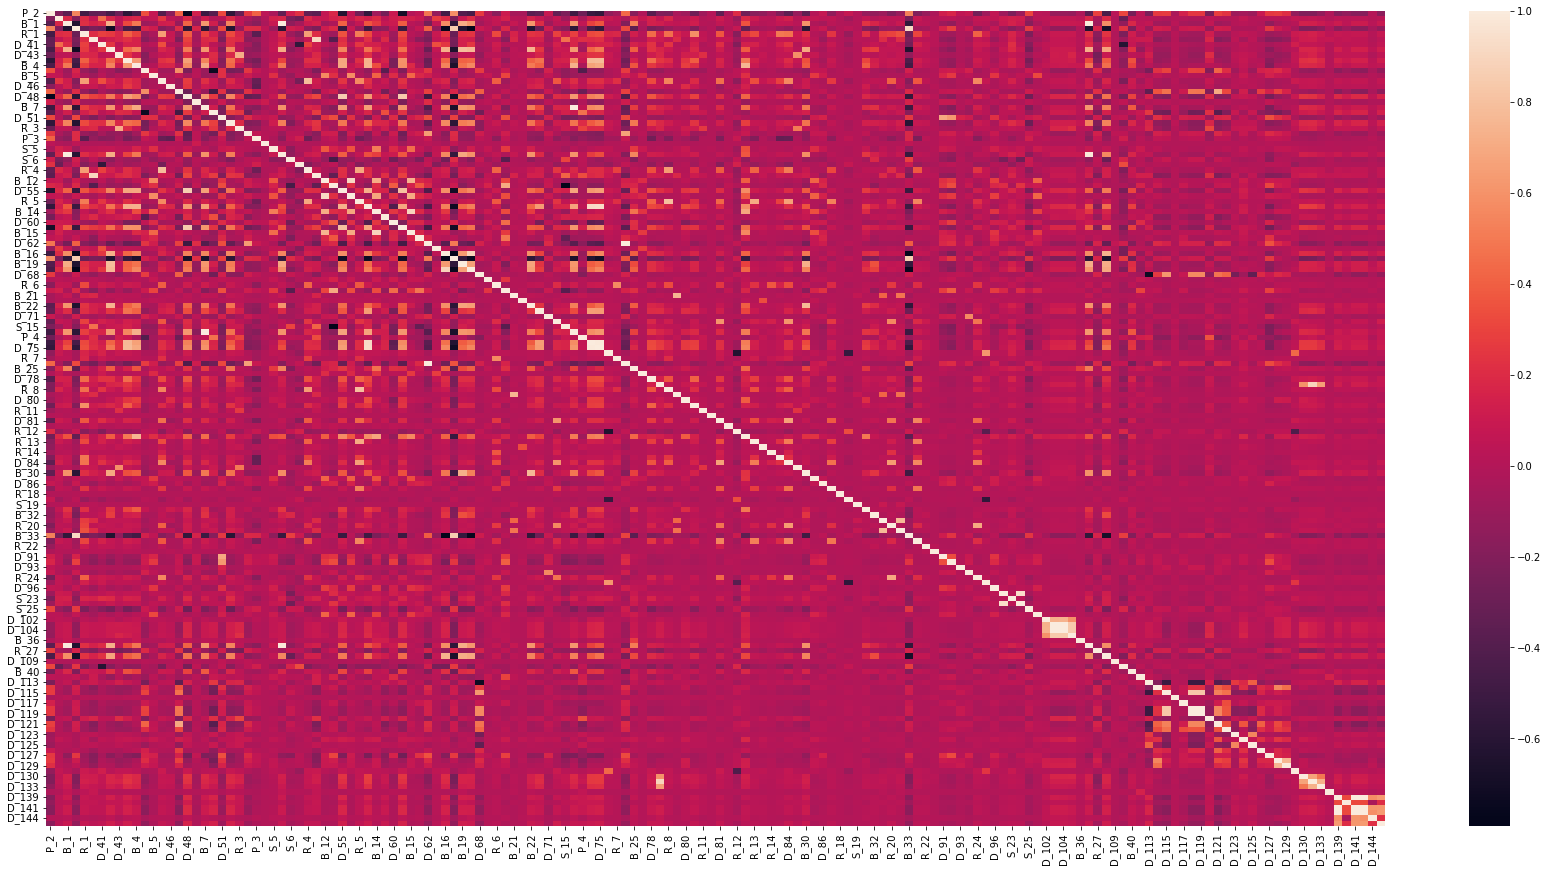

In [19]:
# num_df = num_df.pivot()
f = plt.figure(figsize=(30, 15))
plt = sns.heatmap(updated_df.corr())